## Unsupervised dimensionality reduction via principal component analysis (PCA)



Defining imaginary variables with a linear combination of variables to reduce the dimensions is called PCA.

Based in the book [Python Machine Learning](https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130/ref=sr_1_1?ie=UTF8&qid=1470882464&sr=8-1&keywords=python+machine+learning), del nottebook del [chapter 5](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch05/ch05.ipynb)



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.colors import ListedColormap

if sklearn.__version__ < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
    

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import LatentDirichletAllocation


## [Wine recognition data](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

Sources:
        Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

       Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
       July 1991


- These data are the results of a chemical analysis of  wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents  found in each of the three types of wines. 
- The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
    1. Alcohol.
    2. Malic acid
    3. Ash
    4. Alcalinity of ash  
    5. Magnesium
    6. Total phenols
    7. Flavanoids
    8. Nonflavanoid phenols
    9. Proanthocyanins
    10. Color intensity
    11. Hue
    12. OD280/OD315 of diluted wines
    13. Proline            

Number of Instances

    - class 1 59
	- class 2 71
	- class 3 48


For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)


Class Distribution: number of instances per class
- class 1 59
- class 2 71
- class 3 48

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

### Split and normalize the data
Splitting the data into 70% training and 30% test subsets and then [Standardizing the data](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

**Note that standarized test data is obtained with the fit of the train data!!!**
Here's simple example to explain why this is a problem.

Let's assume we have a simple training set consisting of 3 samples with 1 feature (let's call this feature "length"):

- train_1: 10 cm -> class_2
- train_2: 20 cm -> class_2
- train_3: 30 cm -> class_1

mean: 20, std.: 8.2

After standardization, the transformed feature values are

- train_std_1: -1.21 -> class_2
- train_std_2: 0 -> class_2
- train_std_3: 1.21 -> class_1

Next, let's assume our model has learned to classify samples with a standardized length value < 0.6 as class_2 (class_1 otherwise). So far so good. Now, let's say we have 3 unlabeled data points that we want to classify:

- new_4: 5 cm -> class ?
- new_5: 6 cm -> class ?
- new_6: 7 cm -> class ?

If we look at the "unstandardized "length" values in our training dataset, it is intuitive to say that all of these samples are likely belonging to class_2. However, if we standardize these by re-computing standard deviation and and mean you would get similar values as before in the training set and your classifier would (probably incorrectly) classify samples 4 and 5 as class 2.

- new_std_4: -1.21 -> class 2
- new_std_5: 0 -> class 2
- new_std_6: 1.21 -> class 1

However, if we use the parameters from your "training set standardization," we'd get the values:

- sample5: -18.37 -> class 2
- sample6: -17.15 -> class 2
- sample7: -15.92 -> class 2

The values 5 cm, 6 cm, and 7 cm are much lower than anything we have seen in the training set previously. Thus, it only makes sense that the standardized features of the "new samples" are much lower than every standardized feature in the training set.

In [ ]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    

In [ ]:

#make a standar Scaler and generate trains and test data

X_train_std = 
X_test_std = 


## PCA by hand

Before looking at the PCA algorithm for dimensionality reduction in more detail, let's summarize the approach in a few simple steps:
1. *Standardize the d -dimensional dataset*. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
2. *Construct the covariance matrix*. [np.cov](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)
3. *Decompose the covariance matrix into its eigenvectors and eigenvalues*. [`numpy.linalg.eig`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) 
4. *Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( $k\leqslant d$ )*. [sorted](https://wiki.python.org/moin/HowTo/Sorting)
5. *Construct a projection matrix W from the "top" k eigenvectors*.
6. *Transform the d -dimensional input dataset X using the projection matrix W to obtain the new k -dimensional feature* subspace. [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) between w and x data


**Note** use [`numpy.linalg.eig`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) is probably suboptimal. It would be better to use [`numpy.linalg.eigh`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html) in such cases, which has been designed for [Hermetian matrices](https://en.wikipedia.org/wiki/Hermitian_matrix). The latter always returns real  eigenvalues; whereas the numerically less stable `np.linalg.eig` can decompose nonsymmetric square matrices, you may find that it returns complex eigenvalues in certain cases. (S.R.)



In [ ]:
cov_mat = np.cov(X_train_std.T)
print(cov_mat.shape)

(13, 13)


In [ ]:
# obtain the eigen values and eigen vectors with np.linalg.eig

eigen_vals, eigen_vecs =

print('\nEigenvalues \n%s' % eigen_vals)



Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


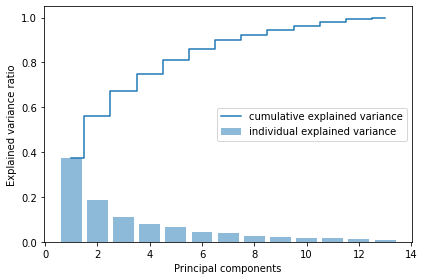

In [ ]:

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = 

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

eigen_pairs[:5]

[(4.892308303273748,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.46635031575923,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.428099727504846,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044957,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450255,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543,  0

In [ ]:

k_principals=2
m=np.array([eigen_pairs[k][1] for k in range(0,k_principals)])
w = m.reshape(k_principals,len(eigen_pairs)).T
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


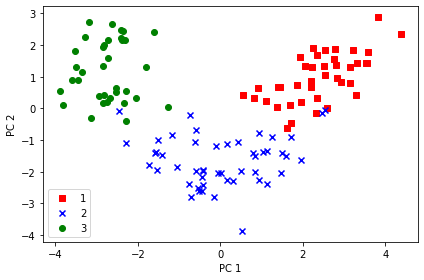

In [ ]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/pca2.png', dpi=300)
plt.show()

No handles with labels found to put in legend.


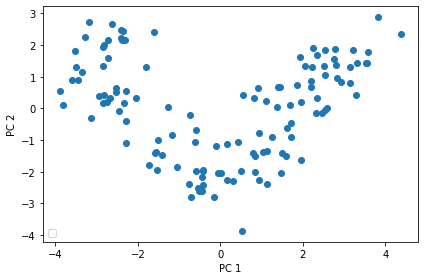

In [ ]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/pca2.png', dpi=300)
plt.show()

## Principal component analysis in scikit-learn

In [ ]:
# use class PCA() to create the transformated data

X_train_pca = 



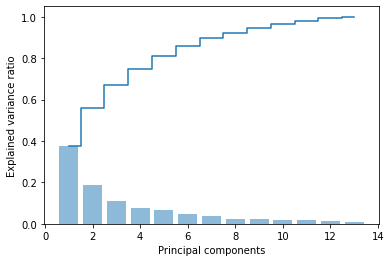

In [ ]:
pca.explained_variance_ratio_
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

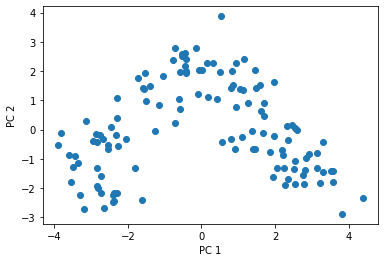

In [ ]:
k_principals=2
pca = PCA(n_components=k_principals)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Now apply classification



In [ ]:
lr = LogisticRegression(random_state=0)
lr = lr.fit(X_train_pca, y_train)


In [ ]:

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


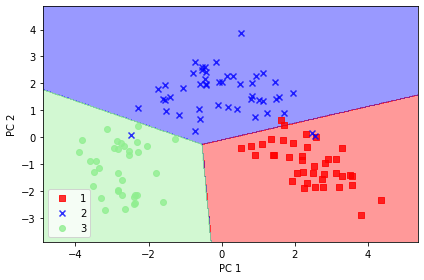

In [ ]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()



## Ejercicio 

Explicar brevemente el metodo de clasificacion .

Despues utilizar el dataset del iris y aplicar el metodo de clasificacion[Stochastic Gradient Descent](http://scikit-learn.org/0.17/modules/sgd.html#classification)  sobre con los dos componentes principales [PCA](http://scikit-learn.org/stable/modules/decomposition.html). Presente las graficas de plot_decision_regions y de la matrix de confusion para los datos de entrenamiento y prueba.
Luego muestre los resultados de la matrix de confusion cuando toma las cuatro variables de entrada. **Cuales serán las ventajas y desventajas de realizar esta disminución de dimensionalidad previo a la clasificación?**



In [ ]:
def print_confusion(m):
    #print is never easy :)
    plt.figure()
    for i in range(0,3):
        for j in range(0,3):
            L=m[i,j]
            plt.scatter(i,j,s=100,marker='$'+str(L)+'$')
            plt.scatter(i,j,s=20*L,marker='o',alpha=0.5)  
    plt.show()

In [ ]:
from sklearn import datasets
np.set_printoptions(precision=3)

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.keys())
x_train,x_test, y_train, y_test  = train_test_split(X,y, train_size = 0.3 , random_state=0) # remove random state o change it


sc = StandardScaler()
x_train_std = 
x_test_std = 

pca_iris = PCA()
x_train_pca = 

print(pca_iris.explained_variance_ratio_)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[0.733 0.226 0.036 0.005]


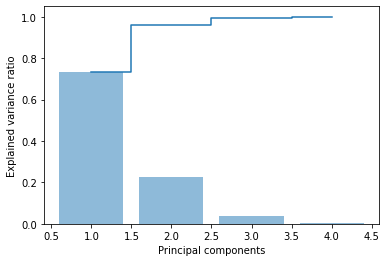

In [ ]:

plt.bar(range(1, X.shape[1]+1), pca_iris.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, X.shape[1]+1), np.cumsum(pca_iris.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

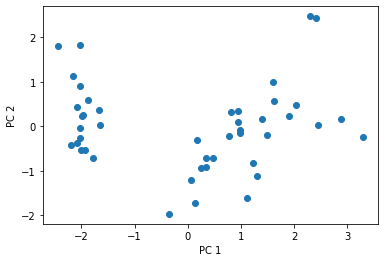

In [ ]:
k_principals=2
x_train_pca=x_train_pca[:,:k_principals]
x_test_pca = 
x_test_pca=x_test_pca[:,:k_principals]

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Kneighbors classificator


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


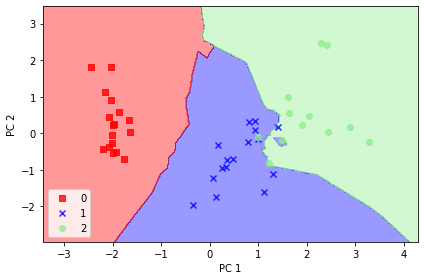

In [ ]:
#lr = LogisticRegression(random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# create and train the classifier


plot_decision_regions(x_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()



[[32  1  0]
 [ 0 33  1]
 [ 0  9 29]]


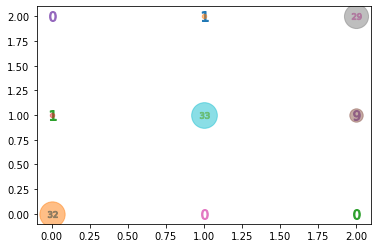

In [ ]:
from sklearn.metrics import confusion_matrix
   
y_estimado=lr.predict(x_test_pca)
m=confusion_matrix(y_test, y_estimado)
print(m)
print_confusion(m)


## Without PCA

[[33  0  0]
 [ 0 33  1]
 [ 0  5 33]]


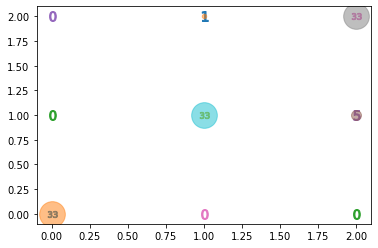

In [ ]:
lr = KNeighborsClassifier(3)

#train the model with x_train,y_train data

y_estimado=lr.predict(x_test)
m=confusion_matrix(y_test, y_estimado)
print(m)
print_confusion(m)


##  SGD Classifficator

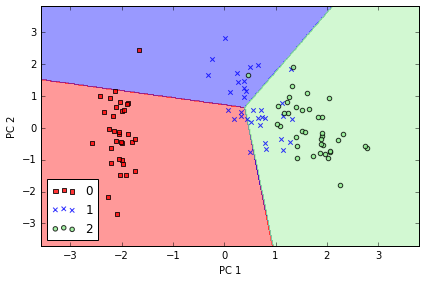

[[32  1  0]
 [ 6 12 16]
 [ 0  1 37]]


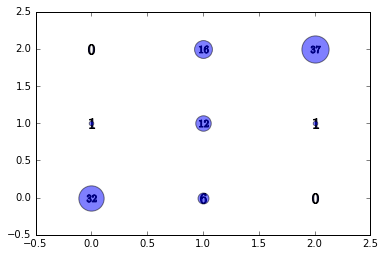

In [ ]:
y_estimado=
m=confusion_matrix(y_test, y_estimado)
print(m)
print_confusion(m)

### Without PCA


[[33  0  0]
 [ 0  0 34]
 [ 0  0 38]]


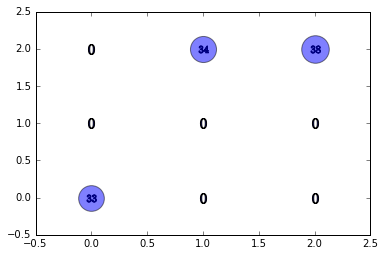

## Example PCA vs LDA 
[scikit-learn](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

explained variance ratio (first two components): [0.92461872 0.05306648]


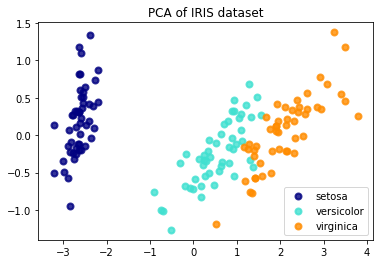

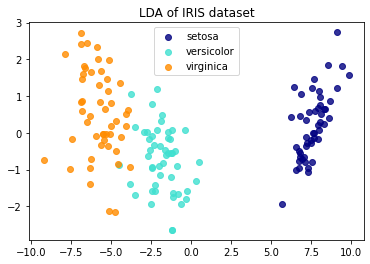